
# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **no-show appointments** is a dataset containing *100,000 information of medical appointments in Brazil* with patients characteristics such as the Gender of the patients, Age, Location, some Diseases, medical benefits, and other features.

### Question(s) for Analysis

> 1. Does sending SMS to patients increses the number of patients that show up for appointment?
> 2. Does Scholarship positively impact the number of patient that show up for the appointment? <br>
> 3. Could suffering from one sickness increase the rate at which a patients show up for appointments? <br>
> 4. What is the effect of the age of patients that suffer from disease(s) on the number of patients that show up for their appointment??


In [102]:
# import packages needed for this project
#import packages needed for the analysis of the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [103]:
# load dataset into a dataframe and check the first 5 rows
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> *The label names are not consistent and need to be renamed for readability* <br>
> *PatientId, AppointmentID, ScheduledDay,AppointmentDay, Neighbourhood are not required for the analysis and need to be dropped* <br>
> *Incorrect values in some scheduled day and appointment day as appointment need to be scheduled before appointment day.hence need to be dropped*

In [104]:
# check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> *this shows that there are **110527 rows** and **14 columns** in the dataset* <br>
> *there are no missing values but there are wrong data type*

In [105]:
# check for number of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> *Handcap could be an outlier as diseases and scholarship has 2 unique each while handcap has 5* <br>
> *There might be a duplicate rows*

In [106]:
# check if rows are duplicated
df.duplicated().sum()

0

> *there is no missing values, no duplicate row*

In [107]:
# check for statistical info of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> *some patient set up their appointment multiple times* <br>
> *some set up their appointment day the same day* <br>
> *some patient pick the same day for their appointment* <br>
> *Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received, are represented by 0 and 1 (meaning yes and no).*
> *Handcap has a maximum values of 4 and min value of 0 which does not correspond with yes and no, hence need to be dropped*
> *The minimum age of -1 is incorrect information* <br>
> *Hipertension, Diebetes, Alcoholism are to be grouped together as diseases*


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [108]:
# view the columns names so as to copy and paste to avoid typo error
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [109]:
# Drop columns names in the drop_col list
drop_col = ['PatientId', 'AppointmentID', 'ScheduledDay','AppointmentDay', 'Neighbourhood', 'Handcap']
for col in drop_col:
    df.drop(col, axis = 1,inplace=True)

In [110]:
# change column names for readability
df.rename(columns = lambda x: x.strip().lower().replace('-', '_'), inplace=True)

In [111]:
# check changes
df.head(0)

,gender,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show


In [112]:
# drop age below 0 
df.drop(df.query('age < 0').index, inplace=True)

In [113]:
# check for the min values of age to see if the are no more value less than 0
df.age.min()

0

In [114]:
#  Combined diseases to respresent number of diseases a patient suffer from
df['diseases'] = df.apply(lambda x: x['hipertension'] + x['diabetes'] + x['alcoholism'], axis=1)

In [115]:
# 0 and 1 in schorlarship and diseases names are boolean and needs to be changed to true and false for readability
df.loc[:,'scholarship':'sms_received'] = df.loc[:,'scholarship':'sms_received'].astype(bool)

In [116]:
# create a categorical variable from a string variable
df.gender = df.gender.replace('F','Female').replace('M','Male').astype('category')

In [117]:
# check for changes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
gender          110526 non-null category
age             110526 non-null int64
scholarship     110526 non-null bool
hipertension    110526 non-null bool
diabetes        110526 non-null bool
alcoholism      110526 non-null bool
sms_received    110526 non-null bool
no_show         110526 non-null object
diseases        110526 non-null int64
dtypes: bool(5), category(1), int64(2), object(1)
memory usage: 4.0+ MB


In [118]:
# view statistical informations to get the data for age categories
df.describe()

,age,diseases
count,110526.000000,110526.000000
mean,37.089219,0.299513
std,23.110026,0.597657
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,115.000000,3.000000


In [120]:
# categorize age 
age_bin = [0,18,37,55,115]
age_label = ['0-18','18-37', '37-55', '55-115']
df['age_group'] = pd.cut(df.age, age_bin, labels =  age_label)

In [121]:
# reset index of the dataframe
df.reset_index(drop=True).head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show,diseases,age_group
0,Female,62,False,True,False,False,False,No,1,55-115
1,Male,56,False,False,False,False,False,No,0,55-115
2,Female,62,False,False,False,False,False,No,0,55-115
3,Female,8,False,False,False,False,False,No,0,0-18
4,Female,56,False,True,True,False,False,No,2,55-115


> **Data has been cleaned**

<a id='eda'></a>
## Exploratory Data Analysis

> **user defined function for visualization of analysis**

In [122]:
def my_plot(my_df, my_kind = 'hist', my_title='', my_color = ['blue','red'], my_alpha= 1, 
            my_xlabel = '', my_ylabel = '', my_figsize = (10,10)):
    my_df.plot(kind = my_kind, color = my_color, alpha = my_alpha,stacked = True)
    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)
    plt.grid()

### Research Question 1 ( Does sending SMS to patients increses the number of patients that show up for appointment?)

In [123]:
# the number of patients that show up and did not show up
pd.DataFrame(df.no_show.value_counts())


,no_show
No,88207
Yes,22319


In [124]:
# proportion of the patients that show up and those that did no show up
no_show_prop = pd.DataFrame(df.no_show.value_counts(normalize=True))
no_show_prop

,no_show
No,0.798066
Yes,0.201934


In [125]:
# proportion of sms_received by patients
sms_received = df.sms_received.value_counts(normalize=True)
sms_received

False    0.678971
True     0.321029
Name: sms_received, dtype: float64

In [126]:
# to check for the effect of sms_recerived on the outcome of patients that show up for their appointment
bysms = df.groupby('sms_received').no_show.value_counts(normalize=True).unstack()
bysms

no_show,No,Yes
sms_received,,
False,0.832965,0.167035
True,0.724255,0.275745


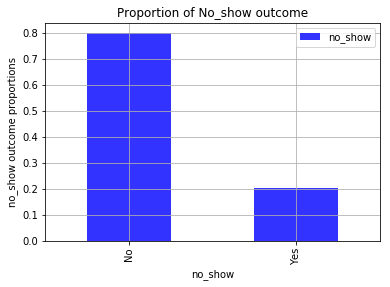

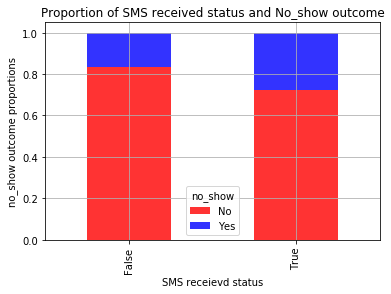

In [127]:
# plots
my_plot(no_show_prop, my_kind = 'bar', my_title = 'Proportion of No_show outcome', 
       my_xlabel = 'no_show', my_ylabel = 'no_show outcome proportions', my_alpha = .8, my_color='blue')

my_plot(bysms, my_kind = 'bar', my_title = 'Proportion of SMS received status and No_show outcome', 
       my_xlabel = 'SMS receievd status', my_ylabel = 'no_show outcome proportions', my_alpha = .8,
        my_color = ['red', 'blue'])

**Findings 1: more proportion of patients did not receive SMS and they show up for their appointments**

### Research Question 2  (Does Scholarship positively impact the number of patient that show up for the appointment?)

In [128]:
# grouping by scholarship to see the effects on outcome of patients that show up
by_sch = df.groupby('scholarship').no_show.value_counts(normalize=True).unstack()
by_sch


no_show,No,Yes
scholarship,,
False,0.801926,0.198074
True,0.762637,0.237363


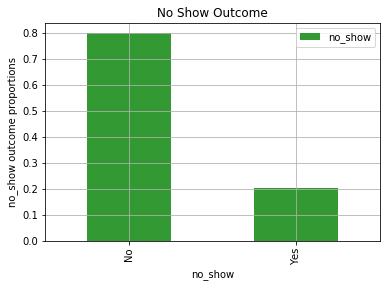

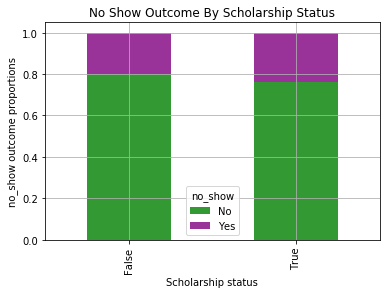

In [129]:
# plot 2
my_plot(no_show_prop, my_kind = 'bar', my_title = 'No Show Outcome', 
       my_xlabel = 'no_show', my_ylabel = 'no_show outcome proportions', my_alpha = .8, my_color = 'green')

my_plot(by_sch, my_kind = 'bar', my_title = 'No Show Outcome By Scholarship Status', 
       my_xlabel = 'Scholarship status', my_ylabel = 'no_show outcome proportions', my_alpha = .8, 
        my_color = ['green', 'purple'])

**Findings 2:** The proportion of patients that benefit from welfare scholarship are less than those that are not on schorlarship

### Research Question 3 (Could suffering from one sickness increase the rate at which a patients show up for appointments?)

In [130]:
# grouping by diseases to see the effect on the outcome of patients that show up for appointment
by_diseases = df.groupby('diseases').no_show.value_counts(normalize=True).unstack()
by_diseases

no_show,No,Yes
diseases,,
0,0.790906,0.209094
1,0.822034,0.177966
2,0.822963,0.177037
3,0.820312,0.179688


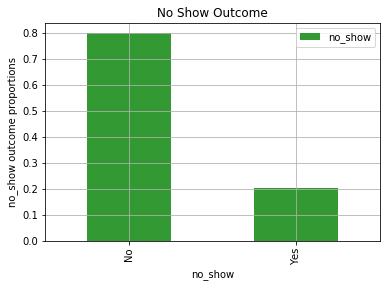

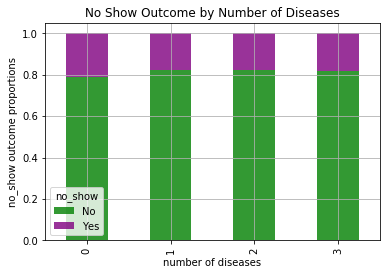

In [131]:
my_plot(no_show_prop, my_kind = 'bar', my_title = 'No Show Outcome', 
       my_xlabel = 'no_show', my_ylabel = 'no_show outcome proportions', my_alpha = .8, my_color = 'green')

my_plot(by_diseases, my_kind = 'bar', my_title = 'No Show Outcome by Number of Diseases', 
       my_xlabel = 'number of diseases', my_ylabel = 'no_show outcome proportions', my_alpha = .8, 
        my_color = ['green', 'purple'])

**Findings 3:** Patients that suffer from one or more diseases show up more for their appointments

### Research Question 4 ( What is the effect of the age of patients that suffer from disease(s) on the number of patients that show up for their appointment?)

In [136]:
# grouping by age group, gender and schorlaship to see the effect on no show outcome
age_grp_disease = df.groupby(['age_group','diseases']).no_show.value_counts(normalize=True).unstack()
age_grp_disease

no_show                   No       Yes
age_group diseases                    
0-18      0         0.775231  0.224769
          1         0.613861  0.386139
          2         0.888889  0.111111
18-37     0         0.764284  0.235716
          1         0.767512  0.232488
          2         0.784211  0.215789
          3         0.777778  0.222222
37-55     0         0.802869  0.197131
          1         0.805017  0.194983
          2         0.824732  0.175268
          3         0.717949  0.282051
55-115    0         0.851577  0.148423
          1         0.843677  0.156323
          2         0.823597  0.176403
          3         0.869822  0.130178

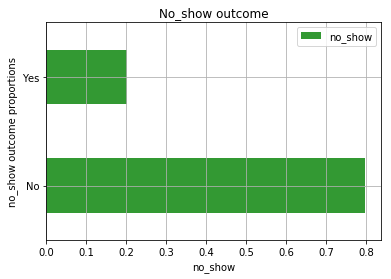

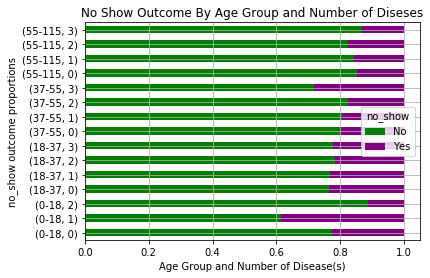

In [137]:
# plot
my_plot(no_show_prop, my_kind = 'barh', my_title = 'No_show outcome', 
       my_xlabel = 'no_show', my_ylabel = 'no_show outcome proportions', my_alpha = .8, my_color = 'green')

my_plot(age_grp_disease, my_kind = 'barh', my_title = 'No Show Outcome By Age Group and Number of Diseses', 
       my_xlabel = 'Age Group and Number of Disease(s)', my_ylabel = 'no_show outcome proportions', 
        my_color = ['green', 'purple'])

**Findings 4:**  From the plot, the patients between the age of 55-155 with or without disease show up more for their appointment.  <br> 
The number of patient that show up based on dieseases are inconsistents

<a id='conclusions'></a>
## Conclusions

> The SMS sent to the patients did not increase the number of patients that showed up for their appointment, Likewise,welfare schorlarship opportunity did not positively impact on the number of patients that show up for their appointment.
However, patients that were sick did show up for their appointment but not consistent like old age patients. It could be predicted that old aged patients will show up for medical appointment irrespective of diseases.

> **Limitation**: The data did not state if SMS were sent to all Pateints and when it is being sent.


In [138]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0